## 신경망 모델

- 이진 분유: 유방암 예측 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


- 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [4]:
cancer_std = StandardScaler().fit_transform(cancer.data)

#### 1. 데이터를 정규/표준화 하지 않은 경우

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2023
)


- 모델정의

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense       # Fully Connected Network

In [8]:
model = Sequential([
    Dense(100,input_dim=30,activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')                                                # (노드의 개수, )
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5549 (21.68 KB)
Trainable params: 5549 (21.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 모델 설정 (컴파일)

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

- 모델 학습

In [10]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,       # 학습중 검증용
                    epochs=100,                  # 반복 횟수
                    batch_size=100              # 동시에 몇개의 데이터를 메모리에 로드하는가.
                    )

Epoch 1/100
4/4 [==============================] - 1s 72ms/step - loss: 59.7818 - accuracy: 0.3599 - val_loss: 37.8582 - val_accuracy: 0.4286
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 32.0555 - accuracy: 0.3599 - val_loss: 20.7727 - val_accuracy: 0.4286
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 16.9759 - accuracy: 0.3599 - val_loss: 9.1292 - val_accuracy: 0.4286
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 7.6506 - accuracy: 0.3599 - val_loss: 3.9061 - val_accuracy: 0.4286
Epoch 5/100
4/4 [==============================] - 0s 28ms/step - loss: 2.7045 - accuracy: 0.3297 - val_loss: 2.9691 - val_accuracy: 0.5385
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 3.0205 - accuracy: 0.6346 - val_loss: 4.2905 - val_accuracy: 0.5934
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 2.4203 - accuracy: 0.6676 - val_loss: 0.3849 - val_accuracy: 0.8242
Epoch 8/100
4/4

- 모델 평가

In [11]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9474


[0.18534675240516663, 0.9473684430122375]

- 훈련 과정 시각화 
    - epochdp Ekfms accuracy, val_loss의 변화

In [12]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

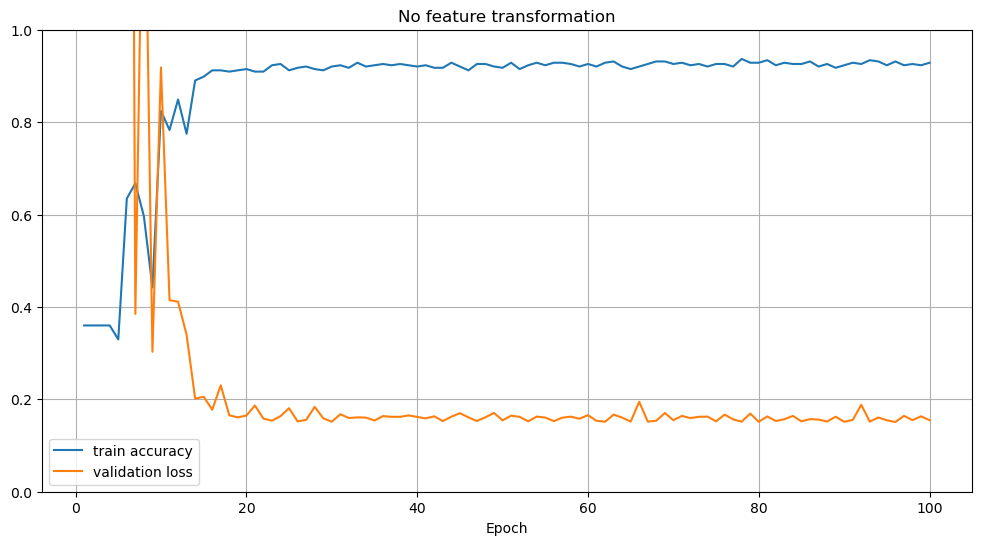

In [13]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1]), plt.xlabel('Epoch')
plt.title('No feature transformation')
plt.show()

#### 2. 데이터를 표준화한 경우

In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std,cancer.target, stratify=cancer.target, test_size=0.2, random_state=2023
)

In [15]:
model2 = Sequential()
model2.add(Dense(100, input_shape=(30,), activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5549 (21.68 KB)
Trainable params: 5549 (21.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# 모델 컴파일
model2.compile('adam', 'binary_crossentropy',metrics=['accuracy'])

In [18]:
# 모델 학습
history2 = model2.fit(X_test2, y_test2, validation_split=0.2,
                      epochs=100, batch_size=100, verbose=0)
  # verbose=0 :넣으면 조용히 프로그램 돌아감

In [20]:
# 모델 평가
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 4ms/step - loss: 0.0471 - accuracy: 0.9912


[0.04712534323334694, 0.9912280440330505]

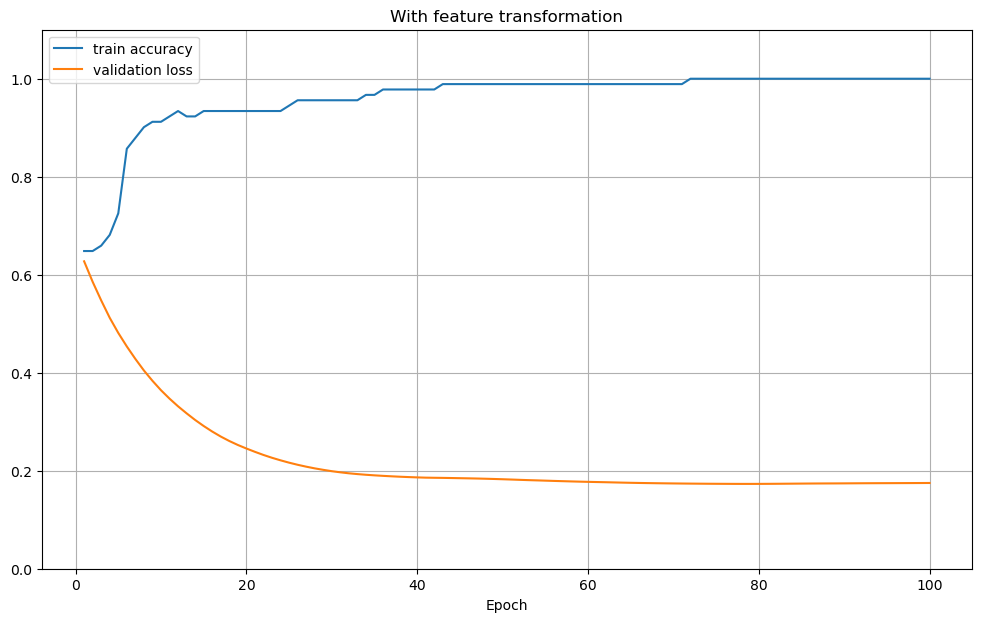

In [21]:


# 학습과정 시각화
y_acc2 = history2.history['accuracy']
y_vloss2 = history2.history['val_loss']
#xs는 위에서 정의했기때문에 또 정의하지 않아도 됨

plt.figure(figsize=(12,7))
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_vloss2, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.1]), plt.xlabel('Epoch')
plt.title('With feature transformation')
plt.show()